# BBC SPORTS

In [29]:
#Text classification using machine learning Algorithms for BBC Sports
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import nltk

## Fetching & Training the data

In [30]:
bbcdir = r'D:\proj\DATASET\bbcsport'
bbc_train = load_files(bbcdir, shuffle=True)
print(len(bbc_train.data))
target_names=bbc_train.target_names
print(target_names)
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(bbc_train.data)
tfidf_transformer = TfidfTransformer()
tfidf_transformer = TfidfTransformer()
bbc_tfidf = tfidf_transformer.fit_transform(bbc_counts)
print(bbc_tfidf.shape)
X_train, X_test, y_train, y_test = train_test_split(
    bbc_tfidf, bbc_train.target, test_size = 0.20, random_state = 12)

print('data loaded')

737
['athletics', 'cricket', 'football', 'rugby', 'tennis']
(737, 8285)
data loaded


##  Using the function

In [31]:
def benchmark(clf,name):
    print('_' * 80)
    print("Training: ")
	
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
	
    t0 = time() 
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
	
    score = metrics.accuracy_score(y_test, pred)
    kappa=metrics.cohen_kappa_score(y_test,pred)
    print("accuracy:   %0.4f" % score)
    print("\nHamming_loss=%0.4f" %metrics.hamming_loss(y_test,pred))
    print("Kappa Score:   %0.4f" %kappa)
    print("\nprecision score=%0.4f" %metrics.precision_score(y_test,pred,average='macro'))
    print("\nRecall Score=%0.4f" %metrics.recall_score(y_test,pred,average='macro'))
    print("\nF1-Score score=%0.4f" %metrics.f1_score(y_test,pred,average='macro'))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
    print("classification report:")
    print(metrics.classification_report(y_test, pred,target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    class_name =str(name).split('(')[0]
    return class_name, score,train_time, test_time

## Printing the Results

In [32]:
results = []
#RESULTS=[NAME_OF_ALGO ACCURACY TRAIN_TIME TEST-TIME]
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge"),
                  (Perceptron(max_iter=50, tol=1e-3),"PPN"),
                  (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"PA"),
                  (KNeighborsClassifier(n_neighbors=10), "kNN"),
                   (LinearSVC(penalty="l2", dual=False,tol=1e-3),"SVM"),
                   (tree.DecisionTreeClassifier(),"DT"),
                   (MultinomialNB(alpha=.01),"M_NB"),
                   (BernoulliNB(alpha=.01),"B_NB"),
                  (RandomForestClassifier(n_estimators=100), "RF"),
                  (SGDClassifier(alpha=.0001, max_iter=50,penalty="l1"),"SGd"),
                  (NearestCentroid(),"NC"),
                  ##(MLPClassifier(),"MLP")
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf,name))
#print("ReSuLtS LIST IS",results,end="\n",sep='\n')

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]
name1, score,training_time, test_time= results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


Ridge
________________________________________________________________________________
Training: 
train time: 0.193s
test time:  0.000s
accuracy:   0.9865

Hamming_loss=0.0135
Kappa Score:   0.9822

precision score=0.9930

Recall Score=0.9852

F1-Score score=0.9887
confusion matrix:
[[20  0  0  0  0]
 [ 0 25  2  0  0]
 [ 0  0 55  0  0]
 [ 0  0  0 23  0]
 [ 0  0  0  0 23]]

classification report:
              precision    recall  f1-score   support

   athletics       1.00      1.00      1.00        20
     cricket       1.00      0.93      0.96        27
    football       0.96      1.00      0.98        55
       rugby       1.00      1.00      1.00        23
      tennis       1.00      1.00      1.00        23

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148

PPN
________________________________________________________________________________
Training: 
train time: 0.01

## PREDICTING THE MAXIMUM ACURACY AND NAME OF THE ALGORITHM

In [33]:
from copy import*
def scope(word, list, indexes = None):
    result = []
    if not indexes:
        indexes = []
    for index, item in enumerate(list):
        try:
            current_index = indexes + [index]
            result.append(current_index + [item.index(word)])
        except ValueError:
            pass

        if type(item[0]) == type([]):
            indexes.append(index)
            result.extend(scope(word, item, copy(indexes)))

    return result
d_list = [['a', 'b', 'new','dsds', 'mpilgrim','new'],
          [['a', 'b', 'new', 'raja','mpilgrim', 'new'],['b', 'd', 'new', 'mpilgrim', 'new']]]
# word1='mpilgrim'
# result1 = scope(word1,d_list)
# print(result1)
listObject12=[]
word = max(score)
result = scope(word,results)
algo=result[0]
i=algo[0]
j=algo[1]
k=i-1
print('Maximmum accuracy is by:  ',results[k][j])
print("Maximmum accuracy is :   %0.4f" %max(score))
dataset_name="BBC SPORTS GROUP"
best_value="BEST_CLF_FROM"
algorithm=results[k][j]
accuracy=max(score)
listObject12.extend((best_value,dataset_name,algorithm,accuracy))
listObject12

Maximmum accuracy is by:   SGd
Maximmum accuracy is :   0.9932


['BEST_CLF_FROM', 'BBC SPORTS GROUP', 'SGd', 0.9932432432432432]

In [34]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(results, tablefmt='html')))

Ridge,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC
0.9864864864864865,0.9864864864864865,0.9864864864864865,0.9527027027027027,0.9864864864864865,0.8918918918918919,0.9864864864864865,0.9662162162162162,0.9797297297297297,0.9932432432432432,0.9459459459459459
0.19268083572387695,0.015624523162841797,0.015625476837158203,0.0,0.08981561660766602,0.16538310050964355,0.00400233268737793,0.008007049560546875,0.6281654834747314,0.06250143051147461,0.0
0.0,0.0,0.0,0.03125357627868652,0.0,0.0,0.0,0.0,0.031249046325683594,0.0,0.0


In [35]:
display(HTML(tabulate.tabulate([listObject12], tablefmt='html')))

BEST_CLF_FROM,BBC SPORTS GROUP,SGd,0.993243


In [36]:
G_np = np.array(results)
G_np.shape

(4, 11)

In [37]:
g1=G_np.transpose()
df=pd.DataFrame(g1,columns=['NAME_OF_ALGO', 'ACCURACY', 'TRAIN_TIME' ,'TEST_TIME',])
df

,NAME_OF_ALGO,ACCURACY,TRAIN_TIME,TEST_TIME
0,Ridge,0.9864864864864865,0.19268083572387695,0.0
1,PPN,0.9864864864864865,0.015624523162841797,0.0
2,PA,0.9864864864864865,0.015625476837158203,0.0
3,kNN,0.9527027027027027,0.0,0.03125357627868652
4,SVM,0.9864864864864865,0.08981561660766602,0.0
5,DT,0.8918918918918919,0.16538310050964355,0.0
6,M_NB,0.9864864864864865,0.00400233268737793,0.0
7,B_NB,0.9662162162162162,0.008007049560546875,0.0
8,RF,0.9797297297297297,0.6281654834747314,0.031249046325683594
9,SGd,0.9932432432432432,0.06250143051147461,0.0


In [38]:
df1=pd.DataFrame(G_np)

In [39]:
pd.DataFrame(listObject12,columns=['final'])

,final
0,BEST_CLF_FROM
1,BBC SPORTS GROUP
2,SGd
3,0.993243


In [40]:
df1['Best Values']=listObject12
df1[0]=['name','acuracy','train',"test"]
df1

,0,1,2,3,4,5,6,7,8,9,10,Best Values
0,name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
1,acuracy,0.9864864864864865,0.9864864864864865,0.9527027027027027,0.9864864864864865,0.8918918918918919,0.9864864864864865,0.9662162162162162,0.9797297297297297,0.9932432432432432,0.9459459459459459,BBC SPORTS GROUP
2,train,0.015624523162841797,0.015625476837158203,0.0,0.08981561660766602,0.16538310050964355,0.00400233268737793,0.008007049560546875,0.6281654834747314,0.06250143051147461,0.0,SGd
3,test,0.0,0.0,0.03125357627868652,0.0,0.0,0.0,0.0,0.031249046325683594,0.0,0.0,0.993243


In [41]:
final_list=df1.values.tolist()
final_list=np.array(final_list)
display(HTML(tabulate.tabulate(final_list, tablefmt='html')))

name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
acuracy,0.9864864864864865,0.9864864864864865,0.9527027027027027,0.9864864864864865,0.8918918918918919,0.9864864864864865,0.9662162162162162,0.9797297297297297,0.9932432432432432,0.9459459459459459,BBC SPORTS GROUP
train,0.015624523162841797,0.015625476837158203,0.0,0.08981561660766602,0.16538310050964355,0.00400233268737793,0.008007049560546875,0.6281654834747314,0.06250143051147461,0.0,SGd
test,0.0,0.0,0.03125357627868652,0.0,0.0,0.0,0.0,0.031249046325683594,0.0,0.0,0.9932432432432432


## Plotting the Graph

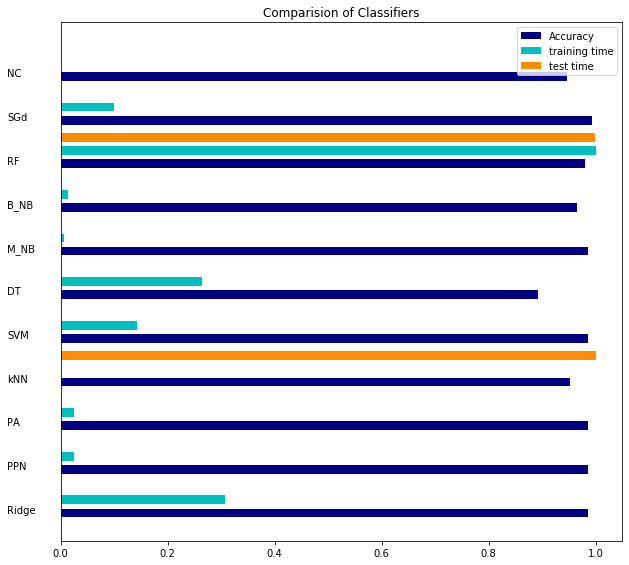

In [42]:
plt.figure(figsize=(12, 8))
plt.title("Comparision of Classifiers")
plt.barh(indices, score, .2, label="Accuracy", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, name1):
    plt.text(-.1, i, c)

plt.show()